In [19]:
# Pandas helps represent data in tables and makes it easy to clean, transform, and analyze the data
# Pandas is a Python library that provides DataFrame and Series objects to efficiently handle, manipulate, and analyze structured data.
import pandas as pd

In [20]:
''' Scikit-learn (sklearn) is one of the most popular machine learning libraries in Python. 
It provides simple and efficient tools for data preprocessing, splitting datasets, building models, and evaluating them. 
It supports both supervised and unsupervised learning algorithms such as regression, classification, clustering, and dimensionality reduction. 
Also includes tools for model evaluation, hyperparameter tuning, and pipelines. '''
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [21]:
# load the dataset into memory
dataset=pd.read_csv("Salary_Data.csv")
dataset # View the dataset

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


In [22]:
# Identify the input feature and assign it to the independent variable
independent=dataset[["YearsExperience"]]
independent

,YearsExperience
0,1.1
1,1.3
2,1.5
3,2.0
4,2.2
5,2.9
6,3.0
7,3.2
8,3.2
9,3.7


In [23]:
# Identify the output variable and assign it to the dependent variable
dependent=dataset[["Salary"]]
dependent

,Salary
0,39343.0
1,46205.0
2,37731.0
3,43525.0
4,39891.0
5,56642.0
6,60150.0
7,54445.0
8,64445.0
9,57189.0


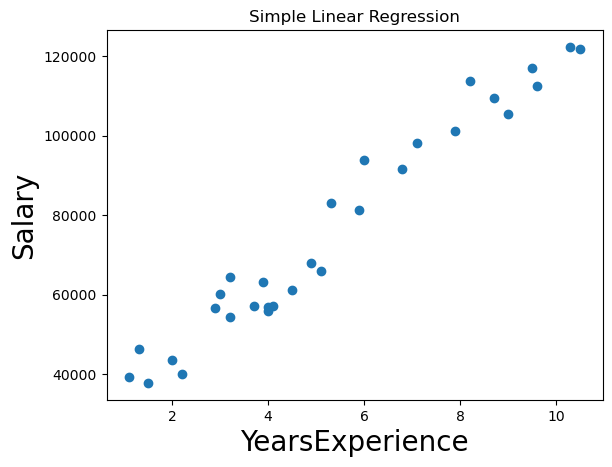

In [27]:
# Plot
import matplotlib.pyplot as plt # Import the matplotlib library for data visualization
plt.figure() # Create a new figure for the plot
plt.scatter(independent, dependent) # Create a scatter plot to visualize the relationship between Years of Experience and Salary
plt.xlabel("YearsExperience",fontsize=20) # Set the label for the X-axis
plt.ylabel("Salary",fontsize=20) # Set the label for the Y-axis
plt.title("Simple Linear Regression") # Set the title of the plot
plt.show() # Display the plot

In [8]:
# Split the data into training and testing sets for model training and evaluation
X_train,X_test,y_train,y_test = train_test_split(independent,dependent,test_size=0.30,random_state=0)

In [9]:
# Create and train a linear regression model using the training data
regressor=LinearRegression()
regressor.fit(X_train,y_train)

LinearRegression()

In [10]:
# Get the learned coefficients (weights) of the linear regression model for the given dataset
# This coefficient represents the change in the predicted target variable 
# for a one-unit increase in the single feature

weight=regressor.coef_
weight

array([[9360.26128619]])

In [11]:
# Get the learned intercept (bias) of the linear regression model for the given dataset
# The intercept represents the predicted value when all feature values are zero
bias=regressor.intercept_
bias

array([26777.3913412])

In [12]:
# Predict the target values for the test data to evaluate how well the model has learned
y_pred=regressor.predict(X_test)

In [13]:
# Evaluate the model using the RSquare score by comparing predicted values with actual test values
# The RSquare score indicates how well the model explains the variability of the target variable

r_score=r2_score(y_test,y_pred)
r_score

0.9740993407213511

In [14]:
# If the RSquare score is close to 1, it indicates that the model is trained well
# In that case, we can save the model for deployment
# Import the pickle module to save the trained model to a file
import pickle
file_name="finalized_simple_linear_model.sav"


In [15]:
# Save the trained linear regression model to a file using pickle
pickle.dump(regressor,open(file_name,'wb'))

In [16]:
# Load the saved linear regression model from the file
# Use the loaded model to make a prediction for a new input (e.g., feature value = 13)
load_model=pickle.load(open("finalized_simple_linear_model.sav","rb"))
result=load_model.predict([[13]]) # Note: Double square brackets [[13]] are used because .predict() expects a 2D array (list of samples)
result # Display the prediction result

C:\Anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[148460.78806172]])